In [6]:
import scipy.io as scio
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
path = './data_nature/BadenEtAl_RGCs_2016_v1.mat'
matdata = scio.loadmat(path)

## Process stage V4--Downsample data with quality_index
### chirp_stim* qi

In [10]:
train_down = np.load("./data_nature/down_cell_data_10.npy")
complete = np.load("./data_nature/cell_data.npy")
cell_volume = matdata['cell_volume']
cell_volume[np.isnan(cell_volume)] = 200 
final_input = np.concatenate((cell_volume, train_down), axis=1)

In [18]:
complete_response = final_input[:,2:] * matdata['chirp_qi']

In [32]:
with_area_volume = np.concatenate((final_input[:,:2], complete_response), axis=1)

In [35]:
complete_cell_input = np.save("./down_data/complete_cell_input", with_area_volume)

### Process stage V3--Downsample the data

In [2]:
### Downsample data
train_down = np.load("./data_nature/cell_data.npy")
sample_rate = 10
downsampled_data = train_down[:,::sample_rate] # take data per 20 sample



In [3]:
np.save("./data_nature/down_cell_data_10.npy", downsampled_data)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3199,)


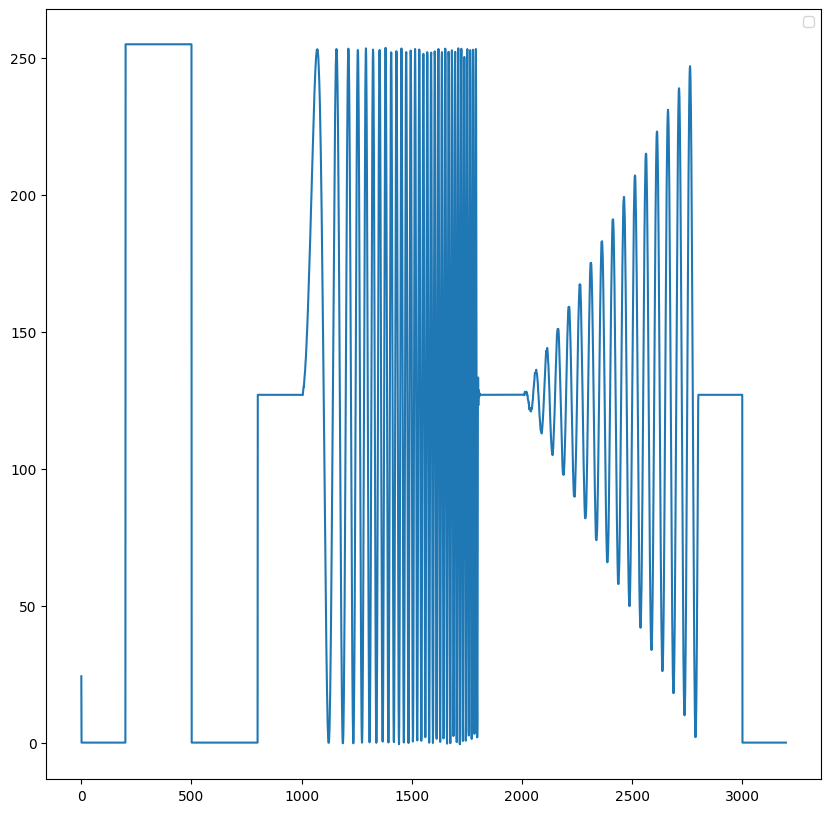

In [5]:
print(downsampled_data[0].shape)
plt.figure(figsize=(10,10))
plt.plot(downsampled_data[0])
plt.legend()
plt.show()

### Process stage V2

In [2]:
train_pca_separate = np.load("./data_nature/cell_data.npy")

# plt.plot(train_lda[0][2:], label='train_loss_re')
# plt.legend()
# plt.show()

In [3]:
train_pca_separate_1 = train_pca_separate[:5000,2:9942]
scale = MinMaxScaler()
train_pca_separate_after_scaler = scale.fit_transform(train_pca_separate_1)

pca = PCA(n_components=3000)
pca.fit(train_pca_separate_after_scaler)
train_pca_separate_1 = pca.transform(train_pca_separate_after_scaler) 

/ssd1/jeryyg/envs/jerry/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


In [6]:
train_pca_separate_2 = train_pca_separate[:5000,9942:18107]
scale = MinMaxScaler()
train_pca_separate2_after_scaler = scale.fit_transform(train_pca_separate_2)

pca = PCA(n_components=15)
pca.fit(train_pca_separate2_after_scaler)
train_pca_separate_2 = pca.transform(train_pca_separate2_after_scaler) 

/ssd1/jeryyg/envs/jerry/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


In [7]:
train_pca_separate_2.shape

(5000, 15)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


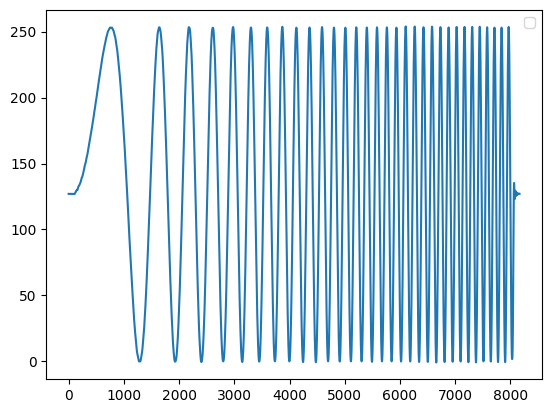

In [9]:
plt.plot(train_pca_separate[0,9942:18107])
plt.legend()
plt.show()

### Process stage V1

In [20]:
label_chrip = matdata['chirp_avg']
np.save("./data_nature/label_chirp.npy", label_chrip)

In [4]:
train = np.load("./data_nature/cell_data.npy")

In [5]:
train = train[:5000,2:]
pca = PCA(n_components=1500)
pca.fit(train)
train_pca = pca.transform(train) 

/ssd1/jeryyg/envs/jerry/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


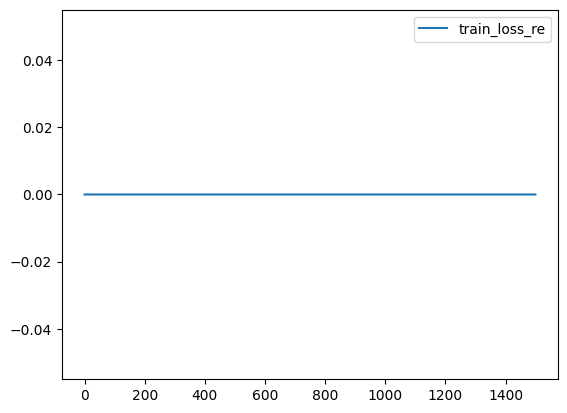

In [9]:
plt.plot(train_pca[0], label='train_loss_re')

plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
plt.show()


In [ ]:
### create a new cell input for chirp
cell_area = matdata['cell_area']
cell_volume = matdata['cell_volume']
cell_volume[np.isnan(cell_volume)] = 200 # convert NAN to a specific number
chirp_qi = matdata['chirp_qi']
# cell = np.concatenate((cell_area,cell_volume),axis = 1)
old_chirp_stim = matdata['chirp_stim'].T
chirp_stim = np.repeat(old_chirp_stim, 11210, axis=0)
# input = np.concatenate((cell, train), axis= 1)
# final_input = np.concatenate((chirp_qi, input), axis=1)

### Reverse PCA and compute accurate

In [8]:
### reverse PCA data
train_reconstructed = pca.inverse_transform(train_pca)

### computer accuracy for PCA
reconstruction_error = np.mean(np.sum((train - train_reconstructed) ** 2, axis=1))
variance = np.mean(np.sum(train ** 2, axis=1))
reconstruction_accuracy = 1 - (reconstruction_error / variance)

In [9]:
reconstruction_accuracy

1.0

In [15]:
cell_combine_area_volume = cell_area + cell_volume
cell_combine_together = cell_combine_area_volume + 10 * chirp_qi

In [17]:
cell_combine_together.shape

(11210, 1)

In [10]:
np.save("./data_nature/new_cell_data.npy", final_input)

# b = np.load("./data_nature/cell_data.npy")

### Process MEA data

In [2]:
import h5py

In [12]:
file = h5py.File('./data_mea/2023-05-24T10-26-15McsRecording_E-00159.h5', 'r')




In [13]:
dataset = file['Data']

In [17]:
for key in file.keys():
    print(file[key], key, file[key].name)

<HDF5 group "/Data" (1 members)> Data /Data


In [27]:
print(dataset['Recording_0'])

<HDF5 group "/Data/Recording_0" (1 members)>


In [23]:
print(file['Data']['Recording_0'].values)

<bound method MappingHDF5.values of <HDF5 group "/Data/Recording_0" (1 members)>>


In [20]:
d1_group = file["Data"]
for key in d1_group.keys():
    print(key, d1_group[key], d1_group[key].name, d1_group[key])

Recording_0 <HDF5 group "/Data/Recording_0" (1 members)> /Data/Recording_0 <HDF5 group "/Data/Recording_0" (1 members)>


In [31]:
d2_group = file["Data"]['Recording_0']['AnalogStream']['Stream_0']['ChannelData']
for key in d2_group.keys():
    print(key, d2_group[key], d2_group[key].name, d2_group[key])

AttributeError: 'Dataset' object has no attribute 'keys'

In [34]:
import matplotlib.pyplot as plt

In [40]:
a = file["Data"]['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][14]

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(a, label='mea')
plt.legend()
plt.show()

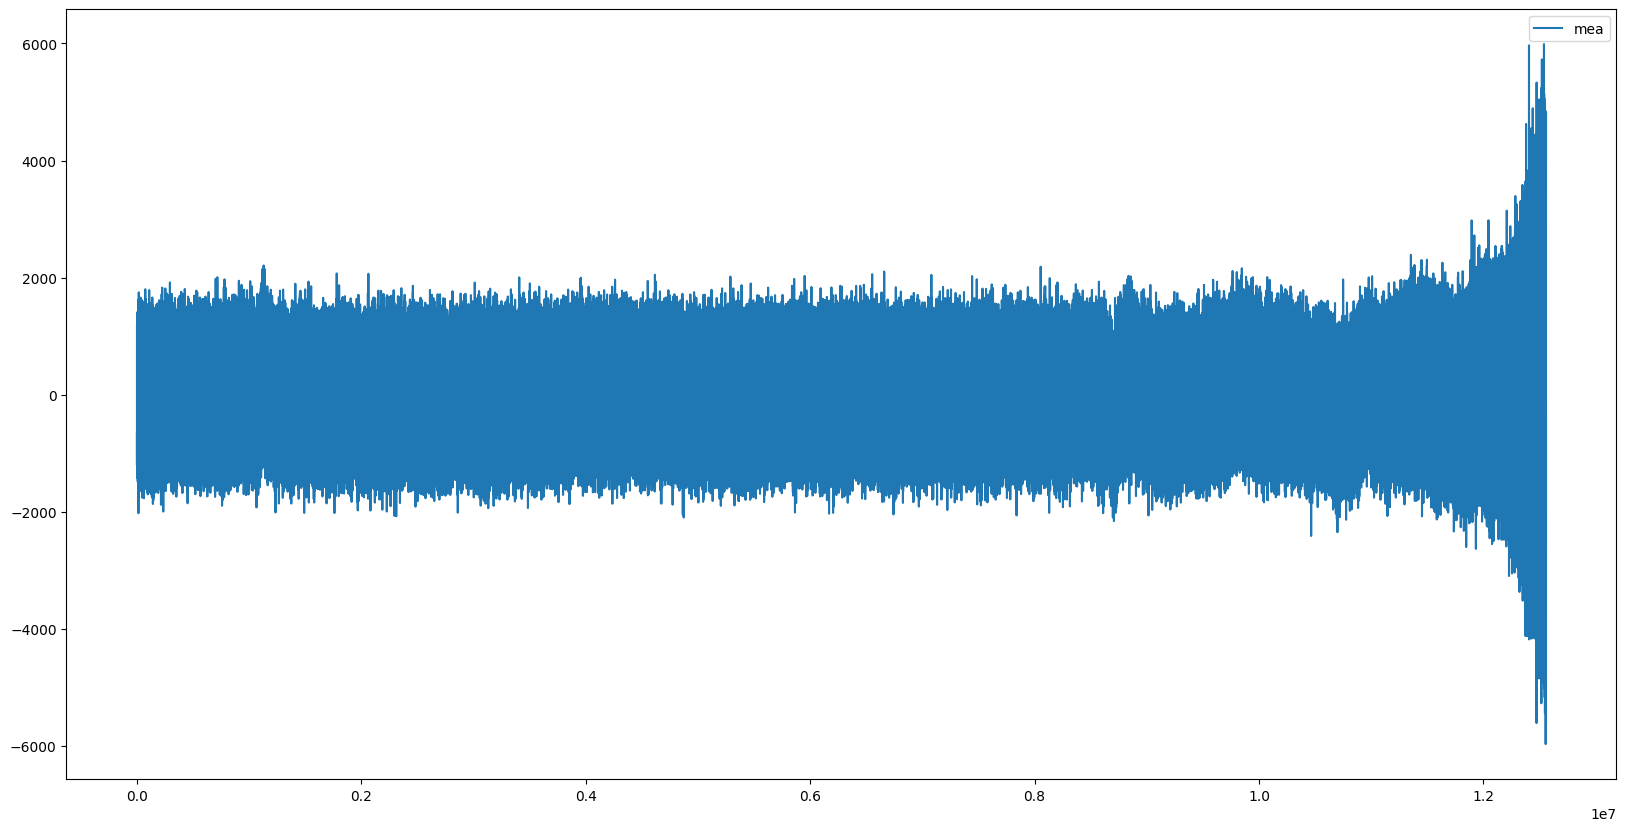

In [39]:
plt.figure(figsize=(20,10))
plt.plot(a, label='mea')
plt.legend()
plt.show()

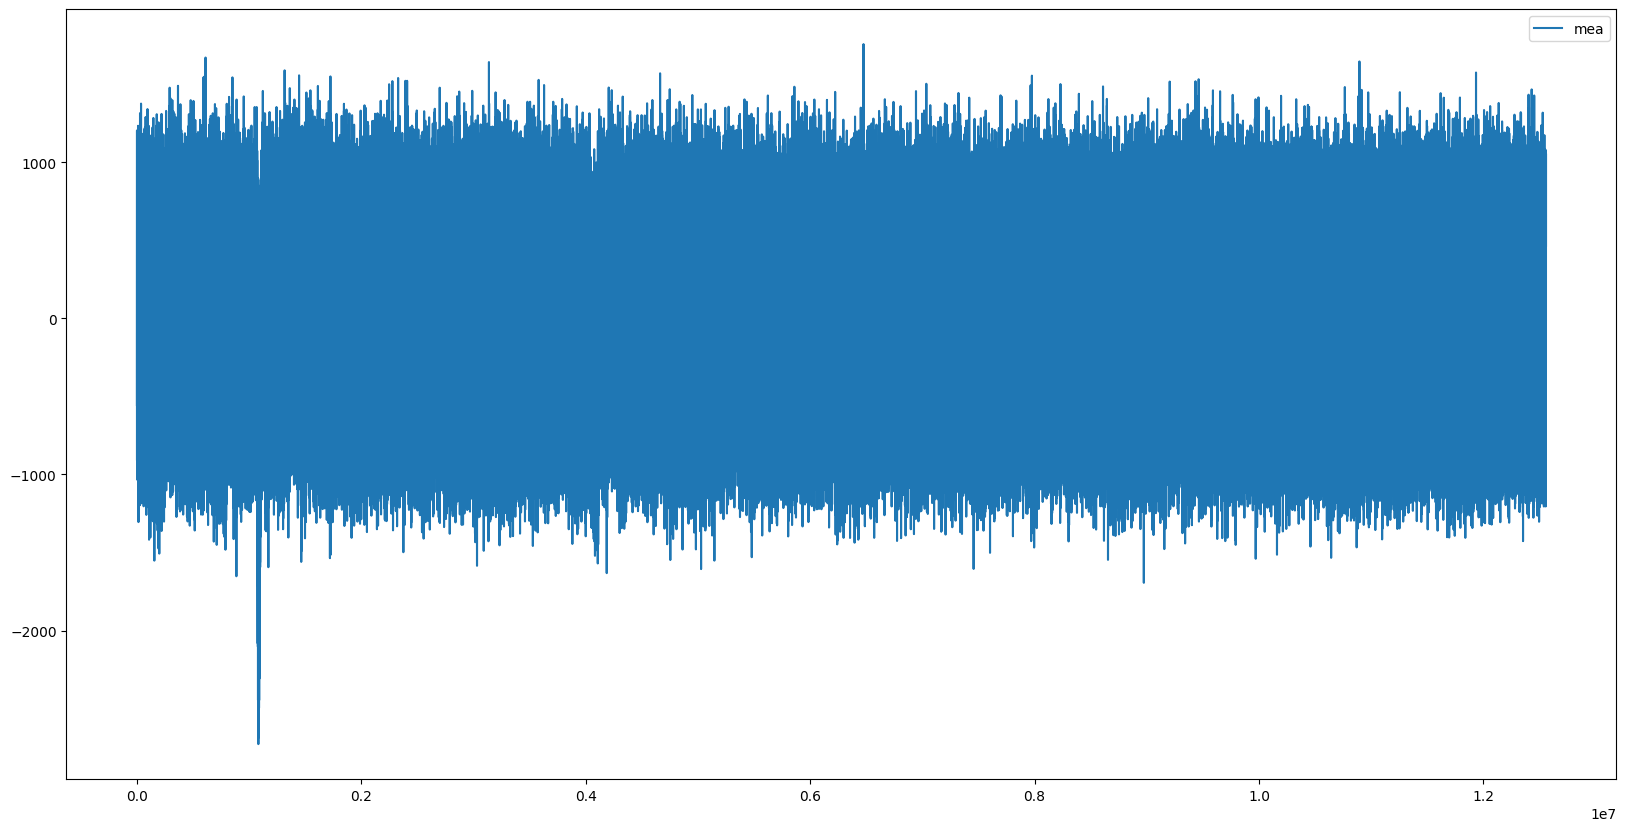

In [37]:
plt.figure(figsize=(20,10))
plt.plot(a, label='mea')
plt.legend()
plt.show()